In [49]:
import pandas as pd
import matplotlib.pyplot as plt

import random

from numpy.random import choice

In [3]:
case_df = pd.read_csv('Recoil Case - Sheet1.csv')
case_df

,Skin,Rarity,Cost_FN,Cost_MW,Cost_FT,Cost_WW,Cost_BS,Cost_FN_ST,Cost_MW_ST,Cost_FT_ST,Cost_WW_ST,Cost_BS_ST,Min_Float,Max_Float
0,UMP-45 | Roadblock,Mil-Spec,0.43,0.26,0.16,0.13,0.12,1.21,0.53,0.30,0.21,0.21,0.00,1.00
1,MAC-10 | Monkeyflage,Mil-Spec,0.43,0.24,0.15,0.13,0.12,1.38,0.58,0.30,0.21,0.20,0.00,1.00
2,Negev | Drop Me,Mil-Spec,0.46,0.26,0.16,0.13,0.12,1.38,0.52,0.29,0.23,0.21,0.00,1.00
3,Galil AR | Destroyer,Mil-Spec,0.46,0.28,0.15,0.15,0.12,1.29,0.65,0.29,0.42,0.25,0.00,0.70
4,FAMAS | Meow 36,Mil-Spec,0.71,0.26,0.17,0.14,0.13,2.25,0.73,0.36,0.27,0.27,0.00,1.00
5,M4A4 | Poly Mag,Mil-Spec,0.64,0.26,0.17,0.14,0.12,3.77,0.78,0.38,0.28,0.25,0.00,1.00
6,Glock-18 | Winterized,Mil-Spec,0.78,0.26,0.17,0.14,0.13,4.83,1.16,0.51,0.31,0.29,0.00,1.00
7,P90 | Vent Rush,Restricted,3.39,2.41,1.52,1.23,1.18,7.01,5.10,2.50,2.84,2.35,0.00,0.70
8,M249 | Downtown,Restricted,3.33,2.38,1.50,1.39,1.23,7.99,5.10,2.66,2.37,1.98,0.00,0.65
9,SG 553 | Dragon Tech,Restricted,3.71,2.49,1.58,1.52,1.23,8.44,5.30,2.81,2.59,2.37,0.00,0.70


In [15]:
case_df['Drop_Chance'] = 0
case_df.loc[case_df['Rarity'] == 'Mil-Spec', 'Drop_Chance'] = 79.92327 / case_df['Rarity'].value_counts()['Mil-Spec']
case_df.loc[case_df['Rarity'] == 'Restricted', 'Drop_Chance'] = 15.98465 / case_df['Rarity'].value_counts()['Restricted']
case_df.loc[case_df['Rarity'] == 'Classified', 'Drop_Chance'] = 3.19693 / case_df['Rarity'].value_counts()['Classified']
case_df.loc[case_df['Rarity'] == 'Covert', 'Drop_Chance'] = 0.63939 / case_df['Rarity'].value_counts()['Covert']
case_df.loc[case_df['Rarity'] == 'Special', 'Drop_Chance'] = 0.25575 / case_df['Rarity'].value_counts()['Special']
case_df['Drop_Chance'] /= case_df['Drop_Chance'].sum()

In [204]:
case_df.head()

,Skin,Rarity,Cost_FN,Cost_MW,Cost_FT,Cost_WW,Cost_BS,Cost_FN_ST,Cost_MW_ST,Cost_FT_ST,Cost_WW_ST,Cost_BS_ST,Min_Float,Max_Float,Drop_Chance
0,UMP-45 | Roadblock,Mil-Spec,0.43,0.26,0.16,0.13,0.12,1.21,0.53,0.30,0.21,0.21,0.0,1.0,0.114176
1,MAC-10 | Monkeyflage,Mil-Spec,0.43,0.24,0.15,0.13,0.12,1.38,0.58,0.30,0.21,0.20,0.0,1.0,0.114176
2,Negev | Drop Me,Mil-Spec,0.46,0.26,0.16,0.13,0.12,1.38,0.52,0.29,0.23,0.21,0.0,1.0,0.114176
3,Galil AR | Destroyer,Mil-Spec,0.46,0.28,0.15,0.15,0.12,1.29,0.65,0.29,0.42,0.25,0.0,0.7,0.114176
4,FAMAS | Meow 36,Mil-Spec,0.71,0.26,0.17,0.14,0.13,2.25,0.73,0.36,0.27,0.27,0.0,1.0,0.114176


In [135]:
test = case_df.iloc[choice(list(range(case_df.shape[0])), 1, p=case_df['Drop_Chance'])]
test.iloc[0]['Min_Float']

0.0

In [60]:
d = {'Wear': ['FN', 'MW', 'FT', 'WW', 'BS'], "MinFloat": [0, 0.07, 0.15, 0.38, 0.45],"MaxFloat": [0.07, 0.15, 0.38, 0.45, 1], "Prob": [0.03, 0.24, 0.33, 0.24, 0.16]}
rarity_df = pd.DataFrame(d)
rarity_df

,Wear,MinFloat,MaxFloat,Prob
0,FN,0.00,0.07,0.03
1,MW,0.07,0.15,0.24
2,FT,0.15,0.38,0.33
3,WW,0.38,0.45,0.24
4,BS,0.45,1.00,0.16


In [170]:
int(True)

1

In [176]:
def get_reward(df, rarity):
  # Draw a random item
  item = df.iloc[choice(list(range(df.shape[0])), 1, p=df['Drop_Chance'])]

  # Decide if Stat-Trak
  is_gloves = item.iloc[0]['Rarity'] == 'Special'
  if is_gloves:
    stat_trak = False
  else:
    stat_trak = 0.1 > random.uniform(0,1)

  # Decide initial quality bin
  wear = rarity.iloc[choice(list(range(rarity.shape[0])), 1, p=rarity['Prob'])]

  # Get float within the bin
  minfloat = wear.iloc[0]['MinFloat']
  maxfloat = wear.iloc[0]['MaxFloat']
  initial_float = random.uniform(minfloat, maxfloat)

  # Convert float to final float and get wear
  minfloat_item = item.iloc[0]['Min_Float']
  maxfloat_item = item.iloc[0]['Max_Float']
  final_float = initial_float * (maxfloat_item - minfloat_item) + minfloat_item

  selected_wear = rarity.loc[(rarity['MinFloat'] < final_float) & (rarity['MaxFloat'] > final_float), 'Wear'].item()
  # Return reward from given data frame
  cost_col = 'Cost_' + selected_wear
  if stat_trak:
    cost_col += '_ST'

  
  reward = item.iloc[0][cost_col]

  #return final_float, item, selected_wear, cost_col, reward
  return reward, int(is_gloves), item.Skin.item()



In [177]:
get_reward(case_df, rarity_df)

(7.95, 0, 'P250 | Visions')

In [178]:
gloves_count = 0
iters = 0
total_reward = 0

while gloves_count < 2:
  iters += 1
  reward, gloves, _ = get_reward(case_df, rarity_df)
  total_reward += reward
  gloves_count += gloves

print(iters, total_reward, iters*3.46)

1088 2024.1300000000062 3764.48


In [187]:
def single_run(unit_cost):
  gloves_count = 0
  iters = 0
  total_reward = 0

  while gloves_count < 2:
    iters += 1
    reward, gloves, _ = get_reward(case_df, rarity_df)
    total_reward += reward
    gloves_count += gloves

  return total_reward - (iters * unit_cost)

In [205]:
single_run()

431.85000000000036

In [196]:
from tqdm.notebook import tqdm

In [198]:
# results = []

for i in tqdm(range(90)):
  results.append(single_run(unit_cost=3.46))


res = pd.DataFrame({'Results': results})


  0%|          | 0/90 [00:00<?, ?it/s]

-751.6794999999926

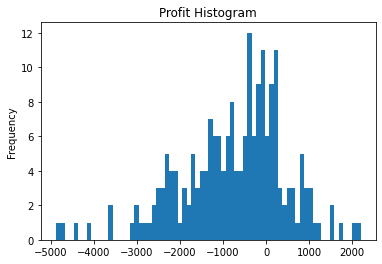

In [203]:
plt.hist(res.Results, bins=70)
plt.gca().set(title='Profit Histogram', ylabel='Frequency');

In [206]:
res.Results.min()

-4875.879999999938